x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.2088 - acc: 0.9381 - val_loss: 0.0582 - val_acc: 0.9806
Epoch 2/5
60000/60000 [==============================] - 7s 108us/step - loss: 0.0713 - acc: 0.9782 - val_loss: 0.0412 - val_acc: 0.9860
Epoch 3/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.0528 - acc: 0.9842 - val_loss: 0.0349 - val_acc: 0.9878
Epoch 4/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.0441 - acc: 0.9862 - val_loss: 0.0287 - val_acc: 0.9900
Epoch 5/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.0358 - acc: 0.9885 - val_loss: 0.0304 - val_acc: 0.9902
Epoch 00005: early stopping
10000/10000 [==============================] - 0s 39us/step
0 6
Final loss: 0.030411, final accuracy: 0.990200
acc: 99.02%
Saved model t

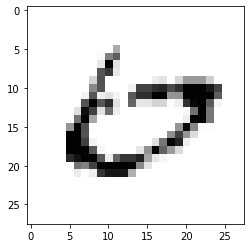

In [9]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.callbacks as kcb

# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = "1"

model_checkpoint = kcb.ModelCheckpoint(
    filepath='keras-weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss')

# early stopping
# early_stop = kcb.EarlyStopping(monitor='val_acc',
#                                min_delta=0.1,
#                                patience=0,
#                                verbose=1,
#                                mode='auto')
early_stop = kcb.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=1)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


# Importing the required Keras modules containing model and layers
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(8, 4), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(4, 6)))
model.add(Flatten())  # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

epochs = 5
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(
    x_test, y_test), callbacks=[early_stop, model_checkpoint])

final_loss, final_acc = model.evaluate(x_test, y_test)
image_index = 445
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax(), y_test[image_index])

# evaluate the model
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(
    final_loss, final_acc))

print("%s: %.2f%%" % (model.metrics_names[1], final_acc*100))

# serialize model to JSON
model_json = model.to_json()
with open('keras-model.epoch-{0:02d}-loss-{1:.2f}-acc-{2:.2f}.hdf5'.format(epochs, final_loss, final_acc), 'w') as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("keras-final-weights.epoch-{0:02d}-loss-{1:.2f}.hdf5".format(epochs, final_loss))
print("Saved model to disk")
